# Making the word clouds for the consumer complaint narrative based on the product category

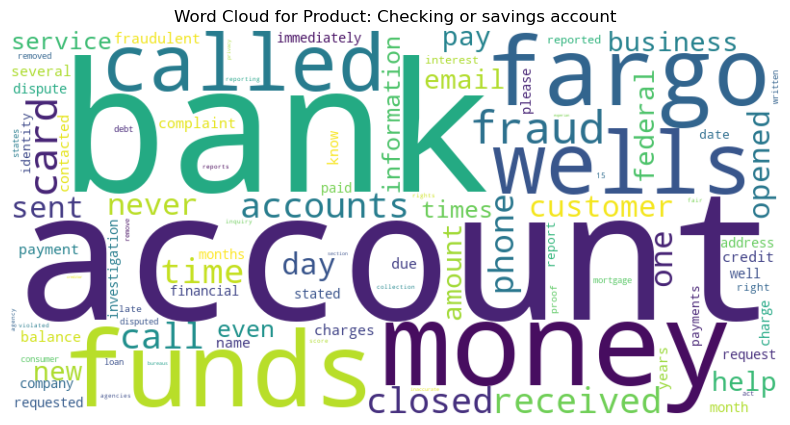

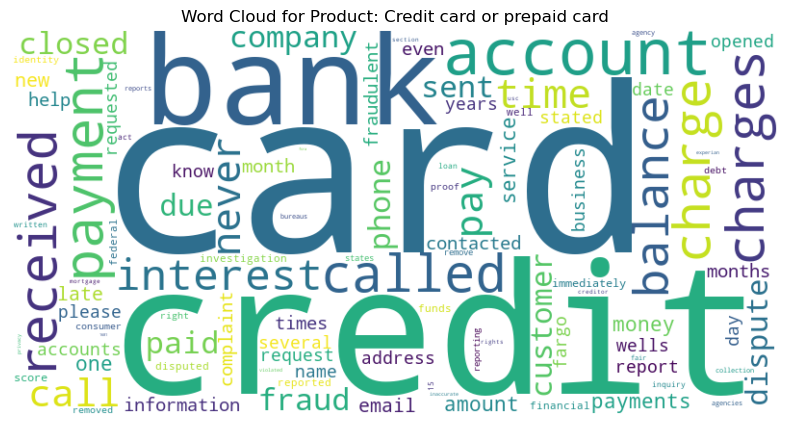

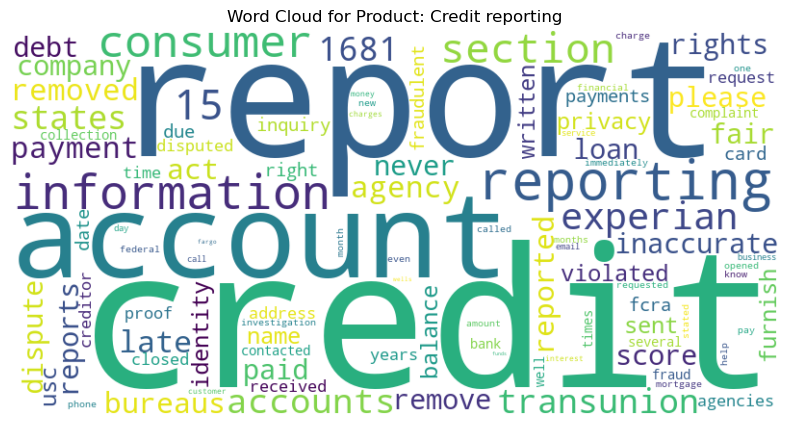

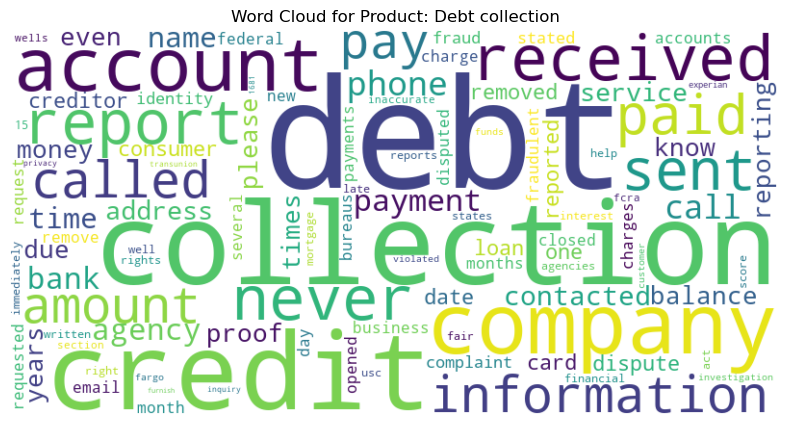

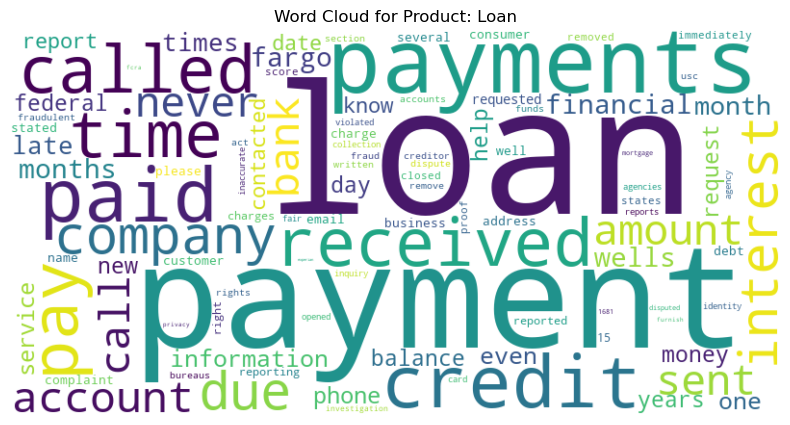

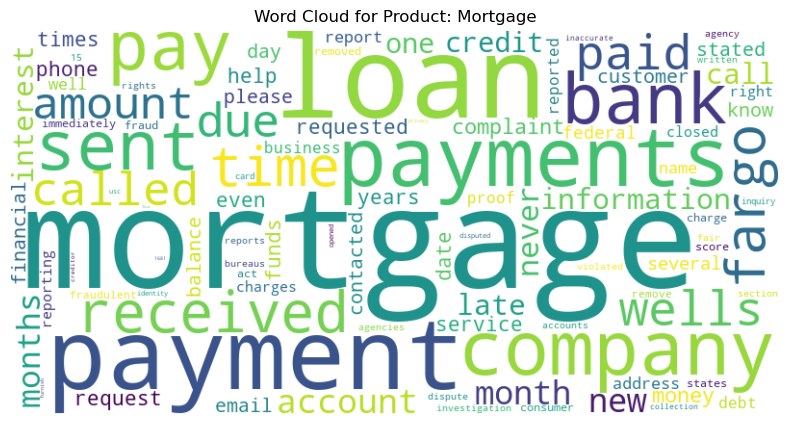

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Download and load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a custom list of stopwords
custom_stopwords = ['xxxx', 'xx', 'xxxxxx', 'xxxxxxxx', 'xxxxxxxxxx', 'xxxxx', 'xxxxxxxxxxxx', '00', 'oo', 'OO', 'said', 'would', 'could', 'told', 'asked', 'without', 'also', 'provide', 'letter', 'made', 'last', 'us', 'back', 'get', 'since', 'following', 'back', 'may', 'days', 'provide', 'check', 'number', 'provided', 'make', 'need', 'still', 'person', 'another', 'file', 'see']

# Update the NLTK stopwords with the custom list
stop_words.update(custom_stopwords)

# Load the data from a CSV file
df = pd.read_csv('filtered_data_new.csv') # Replace with your actual file path

def preprocess_text(text):
    """
    Function to preprocess text data.
    This function performs the following operations:
    - Removes all special characters
    - Removes single characters
    - Removes single characters at the start
    - Replaces multiple spaces with a single space
    - Converts text to lowercase
    - Removes stopwords
    """
    text = re.sub(r'\W', ' ', str(text))  # Remove all the special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single characters at the start
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces with single space
    text = text.lower()  # Convert to lowercase
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Preprocess narratives
df['processed_narrative'] = df['Consumer complaint narrative'].apply(preprocess_text)

# Convert set of stopwords to list
stop_words_list = list(stop_words)

# Initialize a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words=stop_words_list, max_features=100)  # Stopwords included in vectorizer

# Compute TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['processed_narrative'])

# Create a DataFrame from the TF-IDF matrix
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Add the product category back to the TF-IDF DataFrame
tfidf_df['Product'] = df['Product']

# Group by Product and calculate mean TF-IDF for each word
grouped_tfidf = tfidf_df.groupby('Product').mean()

def generate_word_clouds(grouped_data):
    """
    Function to generate word clouds for each product.
    This function iterates over each product in the grouped data,
    generates a word cloud using TF-IDF scores as weights, and displays the word cloud.
    """
    for product, group in grouped_data.iterrows():
        # Generate word cloud using TF-IDF scores as weights
        word_freq = {word: weight for word, weight in group.items()}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Product: {product}')
        plt.axis("off")
        plt.show()

# Generate and display word clouds
generate_word_clouds(grouped_tfidf)